In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 15)

## 问题
* 船上人员的性别，年龄，船票等级？
* 年龄分布？不同性别年龄分布？
* 在船舱中的分布？
* 登船地点？
* 单身还是有家庭？
* 哪些因素影响生还？
* ...

[https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

## 数据

In [2]:
titanic_df = pd.read_csv('./data/train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 不同性别人数

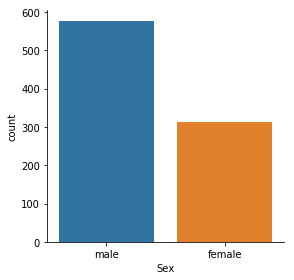

In [6]:
sns.factorplot('Sex', data=titanic_df, kind='count')

## 不同性别，不同等级票的人数
> **｀hue｀** 是表示子等级

In [7]:
sns.FacetGridorplot('Sex', titanic_df_dfa=titanic_df, hue='Pclass', kind='count')

AttributeError: module 'seaborn' has no attribute 'FacetGridorplot'

## 不同等级票的性别

> 在使用 **`factorplot`** 函数的时候，参数 **`order`** 是指使用的顺序。

In [ ]:
sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', order=[1,2,3])

### 男， 女， 小孩

In [20]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [21]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [ ]:
titanic_df.head(10)

In [ ]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person')

## 年龄分析

In [ ]:
titanic_df['Age'].hist(bins=70)

In [ ]:
titanic_df.mean()

In [ ]:
titanic_df['Age'].mean()

In [ ]:
titanic_df['person'].value_counts()

In [ ]:
titanic_df['Age'].value_counts()

> 原来 **`seaborn`** 这么方便，还可以通过figure对象的 **`set`** 方法把一些属性设Hi进去。

In [ ]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=2)   # sns.FaceGrid?,aspect 宽高比率
fig.map(sns.kdeplot,'Age', shade=True)


oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

[http://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid)

In [ ]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

In [ ]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

In [ ]:
titanic_df.head()

## 与船舱的关系

In [32]:
deck = titanic_df['Cabin'].dropna()

In [ ]:
deck.head()

In [ ]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data=cabin_df, palette='winter_d', kind='count',
              order=['A', 'B', 'C', 'D', 'E', 'F', 'T'])
# http://matplotlib.org/users/colormaps.html

In [ ]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', data=cabin_df, palette='summer', kind='count',
              order=['A', 'B', 'C', 'D', 'E', 'F', 'T'])

In [ ]:
## 上船地点？

In [ ]:
titanic_df.head()

In [ ]:
sns.factorplot('Embarked', data=titanic_df, hue='Pclass',
              order=['C','Q','S'], kind='count')

## 一个人或者与家人同行

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [11]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
5      0
6      0
      ..
884    0
885    5
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

> 下面是一种通过条件判断来进行赋值

In [12]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/data/data/com.termux/files/usr/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning](http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning)

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone


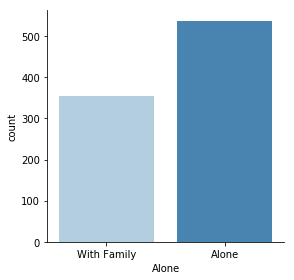

In [14]:
sns.factorplot('Alone', data=titanic_df, palette='Blues', kind='count')

## 生还分析

> 下面也是一种通过条件进行判断的方式

In [15]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,no


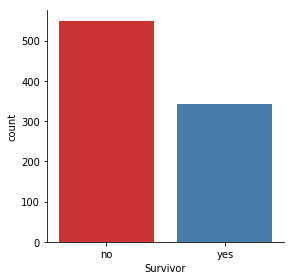

In [17]:
sns.factorplot('Survivor', data=titanic_df, palette='Set1', kind='count')

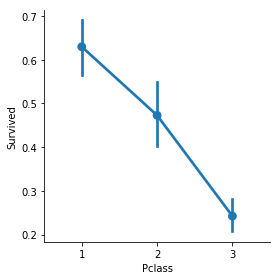

In [18]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1,2 ,3])

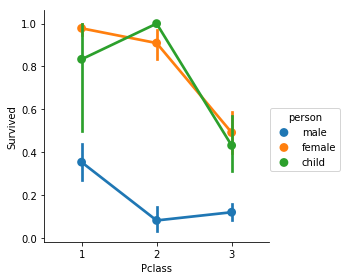

In [22]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, order=[1,2,3])

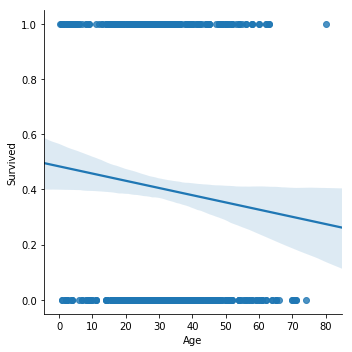

In [23]:
sns.lmplot('Age', 'Survived', data=titanic_df)

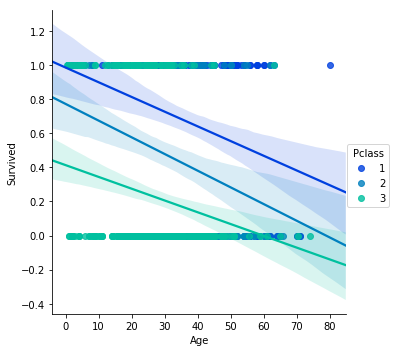

In [24]:
sns.lmplot('Age', 'Survived', hue='Pclass',
          data=titanic_df, palette='winter')

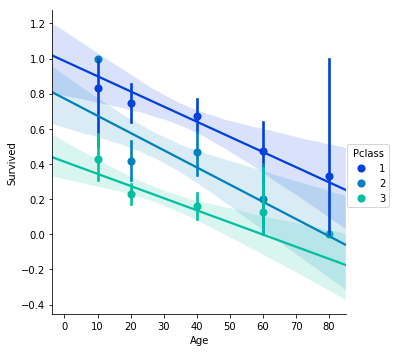

In [25]:
generations = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, 
          palette='winter', x_bins=generations)

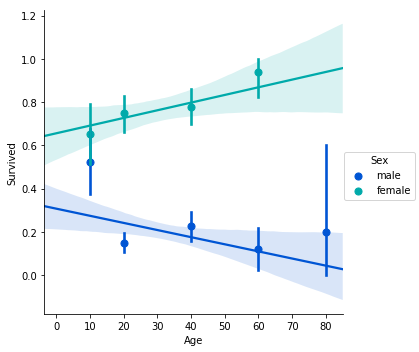

In [26]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df,
          palette='winter', x_bins=generations)

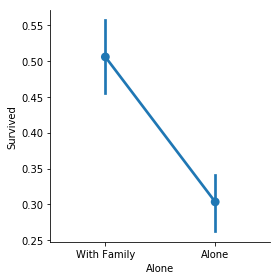

In [27]:
sns.factorplot('Alone', 'Survived', data=titanic_df)

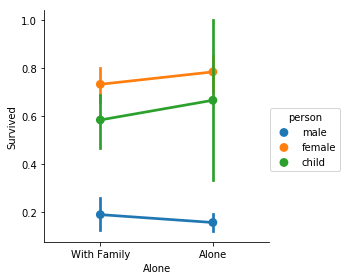

In [29]:
sns.factorplot('Alone', 'Survived', hue='person', data=titanic_df)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 354 but corresponding boolean dimension is 110

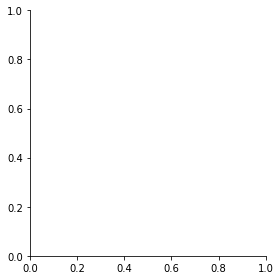

In [33]:
# sns.factorplot('Alone', 'Survived', hue=deck, data=titanic_df)